In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency

%config InlineBackend.figure_format = 'retina'

In [2]:
dt_matrix = pd.read_csv('data/dt_matrix.csv', index_col=0)
dt_matrix.head(2)

,ab,absi,accepi,adhuc,aduersu,aeta,aetate,aeterna,aeternu,affectu,...,uoce,uocibu,uoleba,uolui,uolunta,uoluptate,usque,utique,utru,uul
Liber I.txt,6,0,1,5,3,1,2,2,0,7,...,3,1,7,1,1,1,4,6,4,3
Liber II.txt,5,0,1,1,1,3,1,0,1,2,...,2,0,3,2,1,1,2,1,1,2


In [3]:
raw_counts = dt_matrix.values
feature_names = dt_matrix.columns.values
document_names = dt_matrix.index.values

In [4]:
normalized_counts = (raw_counts / np.sum(raw_counts, axis=1).reshape(-1, 1))
scaled_counts = (normalized_counts - np.mean(normalized_counts, axis=0)) / np.std(normalized_counts, axis=0) # z-score normalization

In [5]:
pca_normalized = PCA()
components_norm = pca_normalized.fit_transform(normalized_counts)

pca_scaled = PCA()
components_scaled = pca_scaled.fit_transform(scaled_counts)

## PCA normalized vs scaled

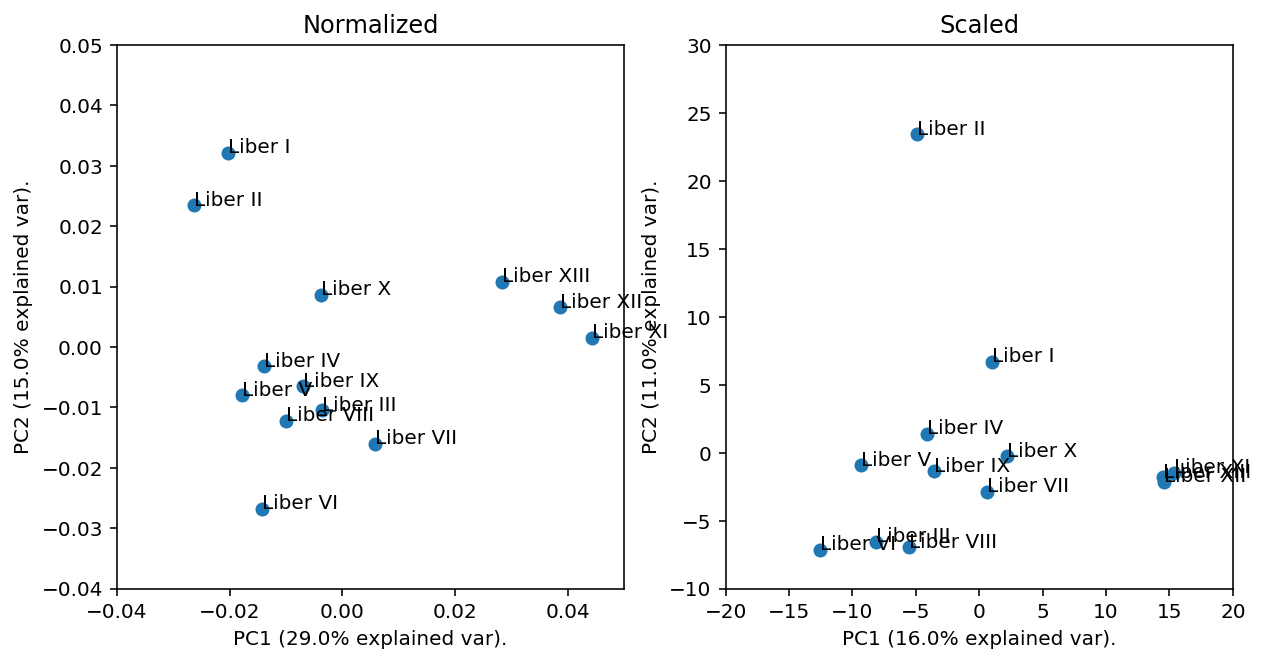

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].scatter(components_norm[:,0], components_norm[:,1])
ax[0].set_title('Normalized')
ax[0].set_xlabel('PC1 ({}% explained var).'.format(round(pca_normalized.explained_variance_ratio_[0] * 100)))
ax[0].set_ylabel('PC2 ({}% explained var).'.format(round(pca_normalized.explained_variance_ratio_[1] * 100)))
ax[0].set_ylim(-0.04, 0.05)
ax[0].set_xlim(-0.04, 0.05)
for i, text in enumerate(components_norm):
    ax[0].text(text[0], text[1], document_names[i].strip('.txt'))

    
ax[1].scatter(components_scaled[:,0], components_scaled[:,1])
ax[1].set_title('Scaled')
ax[1].set_xlabel('PC1 ({}% explained var).'.format(round(pca_scaled.explained_variance_ratio_[0] * 100)))
ax[1].set_ylabel('PC2 ({}% explained var).'.format(round(pca_scaled.explained_variance_ratio_[1] * 100)))

ax[1].set_ylim(-10, 30)
ax[1].set_xlim(-20, 20)
for i, text in enumerate(components_scaled):
    ax[1].text(text[0], text[1], document_names[i].strip('.txt'))
    
plt.subplots_adjust()

## Relation between component strength and frequency 

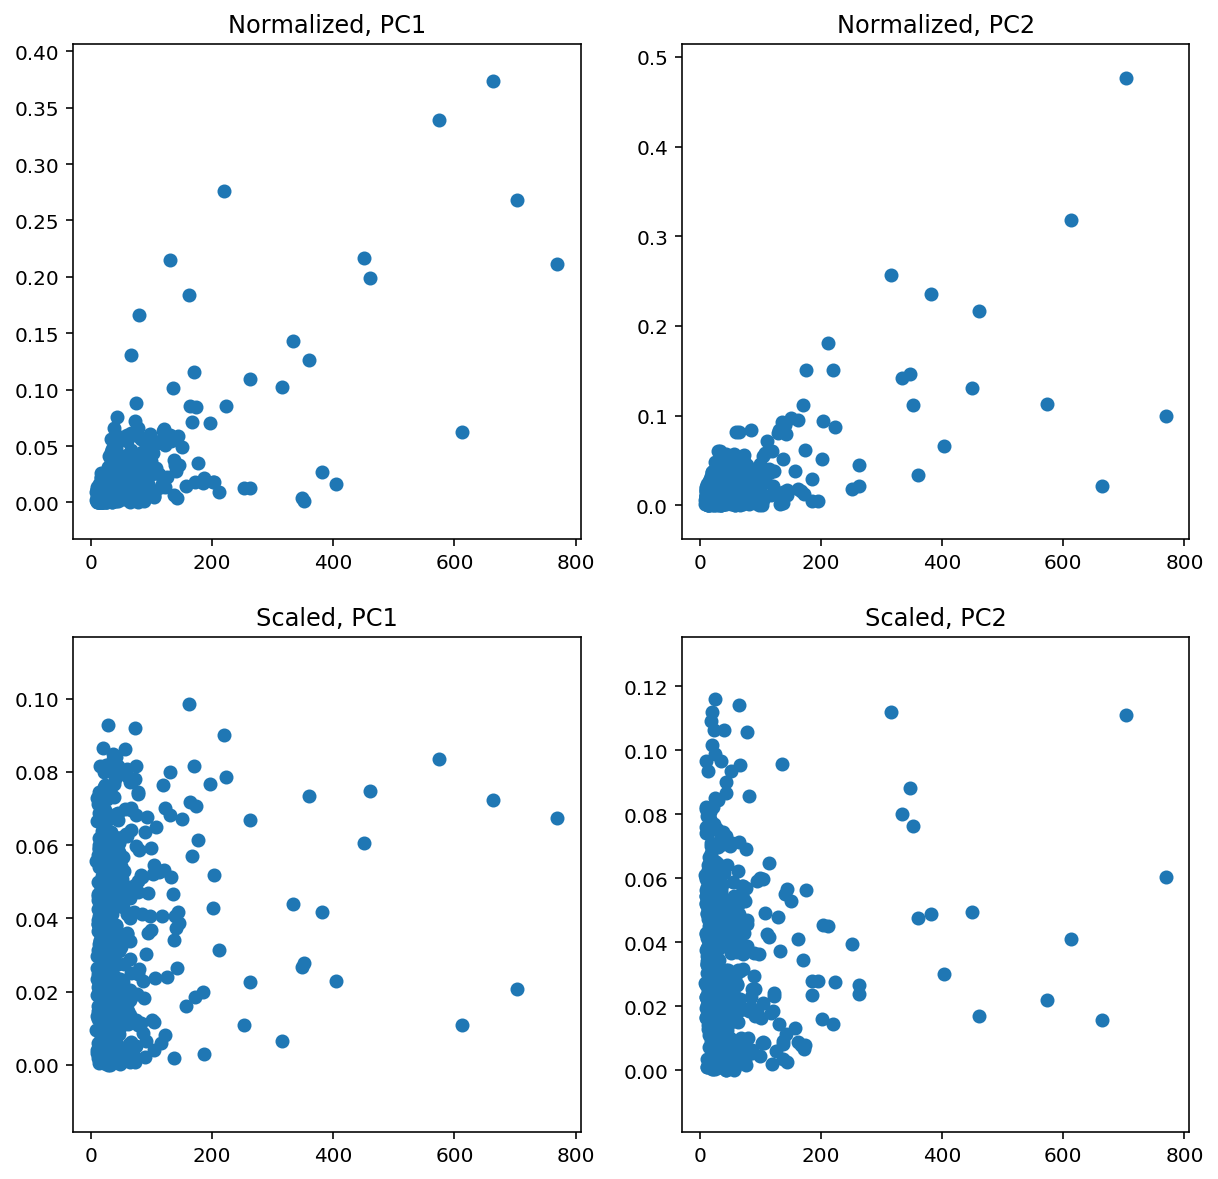

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sum_of_raw_counts = np.sum(raw_counts, axis=0)

ax[0][0].set_title('Normalized, PC1')
ax[0][0].scatter(sum_of_raw_counts, abs(pca_normalized.components_[0]))

ax[0][1].set_title('Normalized, PC2')
ax[0][1].scatter(sum_of_raw_counts, abs(pca_normalized.components_[1]))

ax[1][0].set_title('Scaled, PC1')
ax[1][0].scatter(sum_of_raw_counts, abs(pca_scaled.components_[0]))

ax[1][1].set_title('Scaled, PC2')
ax[1][1].scatter(sum_of_raw_counts, abs(pca_scaled.components_[1]))

## Average percentual contribution of each feature in normalized and scaled settings

(Might not really make sense)

In [8]:
abs_weight_scaled_pc1 = (abs(scaled_counts) - pca_scaled.mean_) * abs(pca_scaled.components_[0])
abs_weight_scaled_rel_pc1 = np.mean(abs_weight_scaled_pc1, axis=0) / np.sum(np.mean(abs_weight_scaled_pc1, axis=0))

abs_weight_scaled_pc2 = (abs(scaled_counts) - pca_scaled.mean_) * abs(pca_scaled.components_[1])
abs_weight_scaled_rel_pc2 = np.mean(abs_weight_scaled_pc2, axis=0) / np.sum(np.mean(abs_weight_scaled_pc2, axis=0))

abs_weight_norm_pc1 = (abs(normalized_counts - pca_normalized.mean_)) * abs(pca_normalized.components_[0])
abs_weight_norm_rel_pc1 = np.mean(abs_weight_norm_pc1, axis=0) / np.sum(np.mean(abs_weight_norm_pc1, axis=0))

abs_weight_norm_pc2 = (abs(normalized_counts - pca_normalized.mean_)) * abs(pca_normalized.components_[1])
abs_weight_norm_rel_pc2 = np.mean(abs_weight_norm_pc2, axis=0) / np.sum(np.mean(abs_weight_norm_pc2, axis=0))

<BarContainer object of 522 artists>

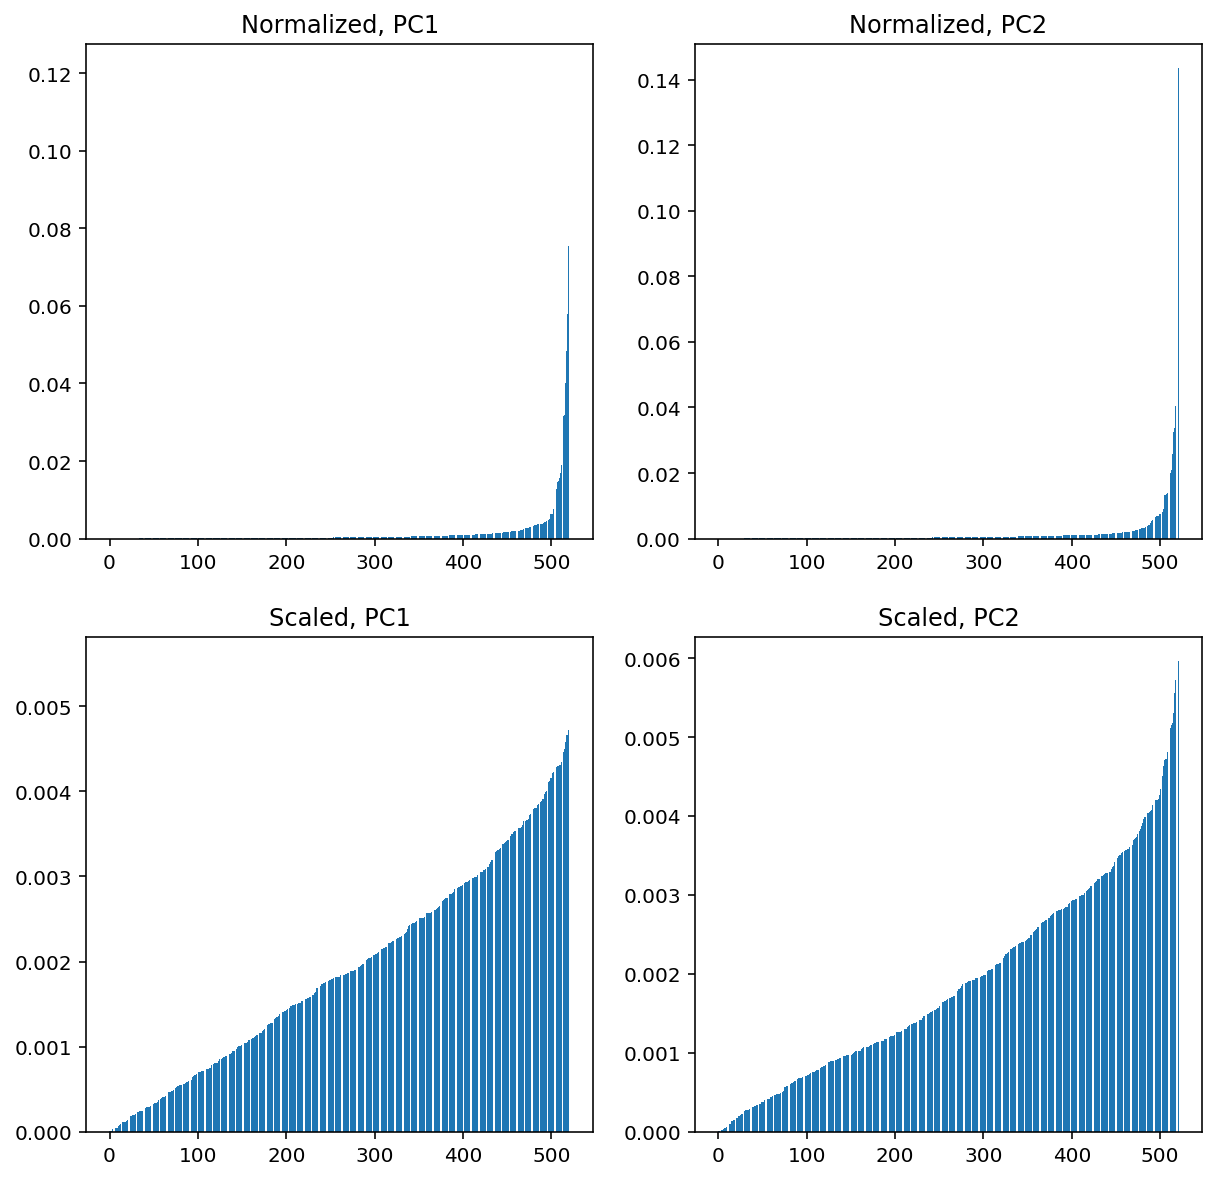

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0][0].set_title('Normalized, PC1')
ax[0][0].bar(range(len(abs_weight_norm_rel_pc1)), sorted(abs_weight_norm_rel_pc1))

ax[0][1].set_title('Normalized, PC2')
ax[0][1].bar(range(len(abs_weight_norm_rel_pc2)), sorted(abs_weight_norm_rel_pc2))

ax[1][0].set_title('Scaled, PC1')
ax[1][0].bar(range(len(abs_weight_scaled_rel_pc1)), sorted(abs_weight_scaled_rel_pc1))

ax[1][1].set_title('Scaled, PC2')
ax[1][1].bar(range(len(abs_weight_scaled_rel_pc2)), sorted(abs_weight_scaled_rel_pc2))

## Log-likelihood word significance vs component strenght


In [10]:
contingency_tables = [np.stack((raw_counts[:,i], np.sum(raw_counts, axis=1)), axis=1) for i in range(len(feature_names))]
chi2_scores = [chi2_contingency(contingency_table, lambda_="log-likelihood") 
               for contingency_table in contingency_tables]
p_values = [score[1] for score in chi2_scores]

Text(0.5, 0, 'p-value')

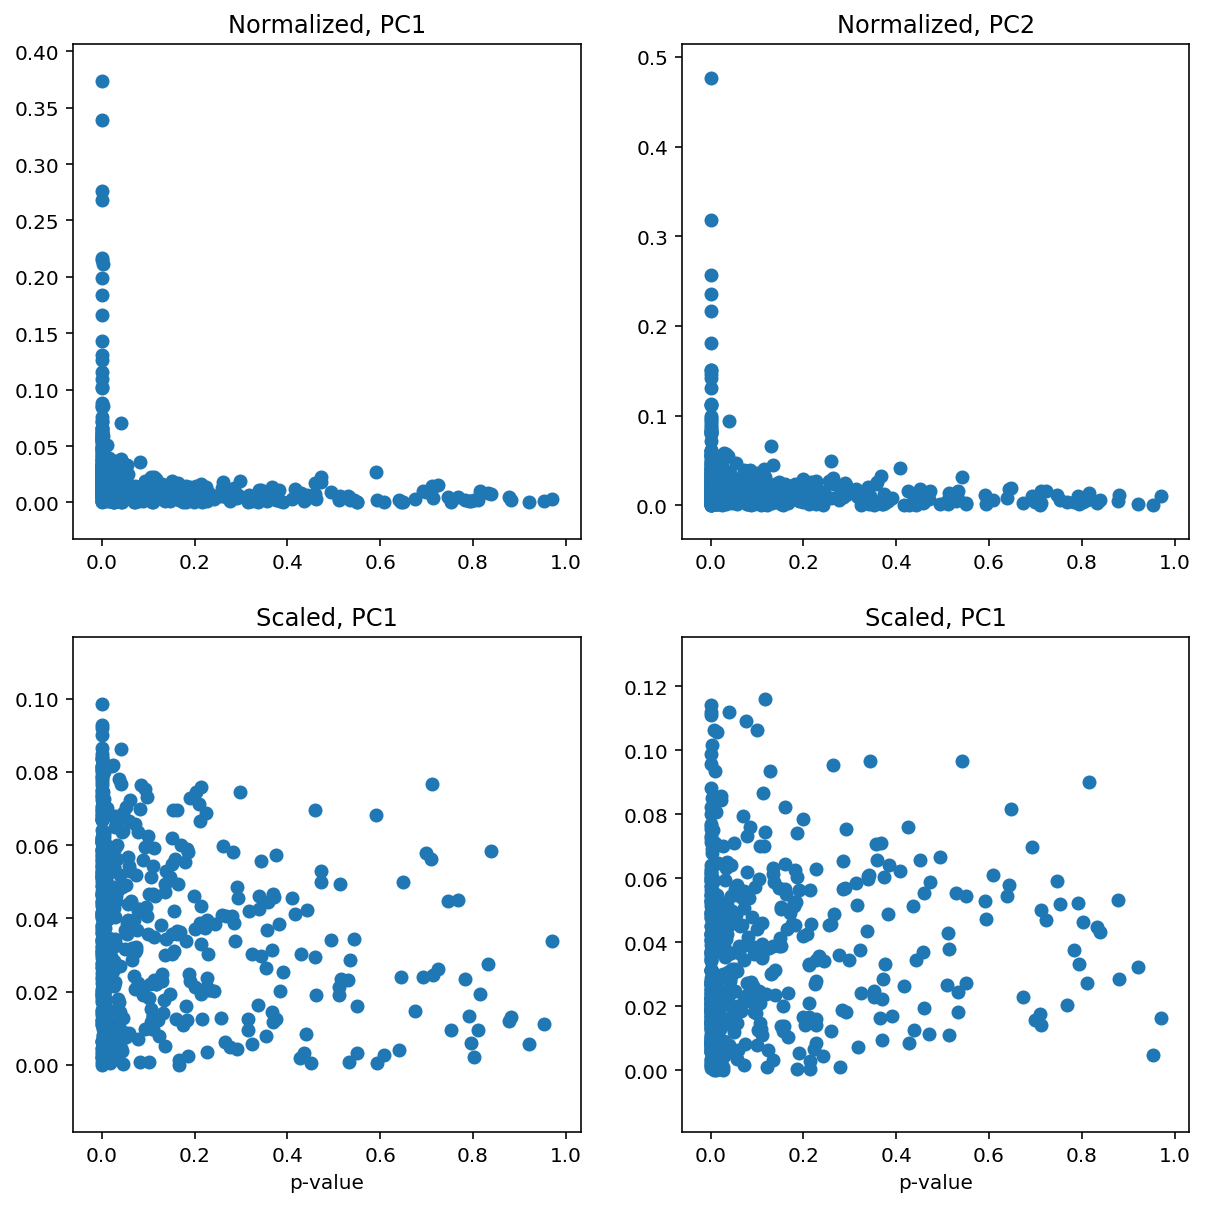

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sum_of_raw_counts = np.sum(raw_counts, axis=0)

ax[0][0].set_title('Normalized, PC1')
ax[0][0].scatter(p_values, abs(pca_normalized.components_[0]))

ax[0][1].set_title('Normalized, PC2')
ax[0][1].scatter(p_values, abs(pca_normalized.components_[1]))

ax[1][0].set_title('Scaled, PC1')
ax[1][0].scatter(p_values, abs(pca_scaled.components_[0]))
ax[1][0].set_xlabel('p-value')

ax[1][1].set_title('Scaled, PC1')
ax[1][1].scatter(p_values, abs(pca_scaled.components_[1]))
ax[1][1].set_xlabel('p-value')

## PCA normalized vs scaled vs scaled but only significant words

In [13]:
pca_scaled_significant = PCA()
components_sig_scaled = pca_scaled_significant.fit_transform([scaled_count[np.array(p_values) < 0.05] for scaled_count in scaled_counts])

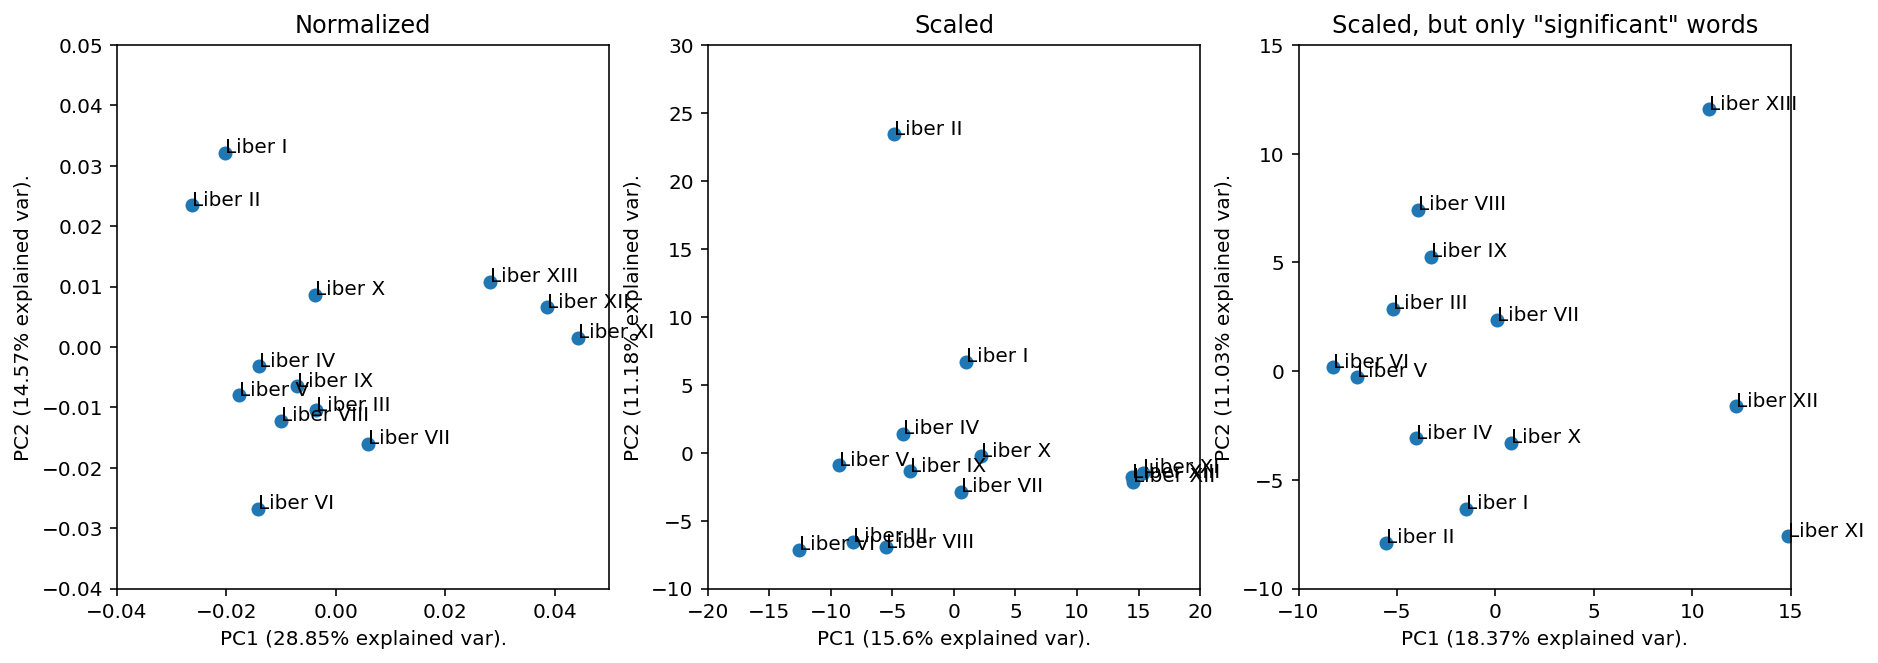

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(components_norm[:,0], components_norm[:,1])
ax[0].set_title('Normalized')
ax[0].set_xlabel('PC1 ({}% explained var).'.format(round(pca_normalized.explained_variance_ratio_[0] * 100,2)))
ax[0].set_ylabel('PC2 ({}% explained var).'.format(round(pca_normalized.explained_variance_ratio_[1] * 100,2)))
ax[0].set_ylim(-0.04, 0.05)
ax[0].set_xlim(-0.04, 0.05)
for i, text in enumerate(components_norm):
    ax[0].text(text[0], text[1], document_names[i].strip('.txt'))

ax[1].scatter(components_scaled[:,0], components_scaled[:,1])
ax[1].set_title('Scaled')
ax[1].set_xlabel('PC1 ({}% explained var).'.format(round(pca_scaled.explained_variance_ratio_[0] * 100,2)))
ax[1].set_ylabel('PC2 ({}% explained var).'.format(round(pca_scaled.explained_variance_ratio_[1] * 100,2)))
ax[1].set_ylim(-10, 30)
ax[1].set_xlim(-20, 20)
for i, text in enumerate(components_scaled):
    ax[1].text(text[0], text[1], document_names[i].strip('.txt'))
    
ax[2].scatter(components_sig_scaled[:,0], components_sig_scaled[:,1])
ax[2].set_title('Scaled, but only "significant" words')
ax[2].set_xlabel('PC1 ({}% explained var).'.format(round(pca_scaled_significant.explained_variance_ratio_[0] * 100, 2)))
ax[2].set_ylabel('PC2 ({}% explained var).'.format(round(pca_scaled_significant.explained_variance_ratio_[1] * 100, 2)))
ax[2].set_ylim(-10, 15)
ax[2].set_xlim(-10, 15)
for i, text in enumerate(components_sig_scaled):
    ax[2].text(text[0], text[1], document_names[i].strip('.txt'))
    
plt.subplots_adjust()

## A dummy example illustrating possible problems with scaling

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

text_1 = 'dog ' * 200 + 'cat ' * 100 + 'fog ' * 1 + 'random_stop_word ' * 99
text_2 = 'dog ' * 200 + 'cat ' * 100 + 'fat ' * 1 + 'random_stop_word ' * 106
text_3 = 'dog ' * 100 + 'cat ' * 200 + 'fat ' * 1 + 'random_stop_word ' * 92
text_4 = 'dog ' * 100 + 'cat ' * 200 + 'fog ' * 1 + 'random_stop_word ' * 101
 
labels = ['dog_fog', 'dog_fat', 'cat_fat', 'cat_fog']

cv = CountVectorizer()
dt_matrix_dummy = cv.fit_transform([text_1, text_2, text_3, text_4])
dt_matrix_dummy_dense = np.array(dt_matrix_dummy.todense()) 
dt_matrix_dummy_dense_norm = dt_matrix_dummy_dense / np.sum(dt_matrix_dummy_dense, axis=1).reshape(-1, 1)
dt_matrix_dummy_dense_scaled = (dt_matrix_dummy_dense_norm - 
                                np.mean(dt_matrix_dummy_dense_norm, axis=0)) / np.std(dt_matrix_dummy_dense_norm, axis=0)

pca_dummy_norm = PCA()
reduced_dummy_norm = pca_dummy_norm.fit_transform(dt_matrix_dummy_dense_norm)

pca_dummy_scaled = PCA()
reduced_dummy_scaled = pca_dummy_scaled.fit_transform(dt_matrix_dummy_dense_scaled)

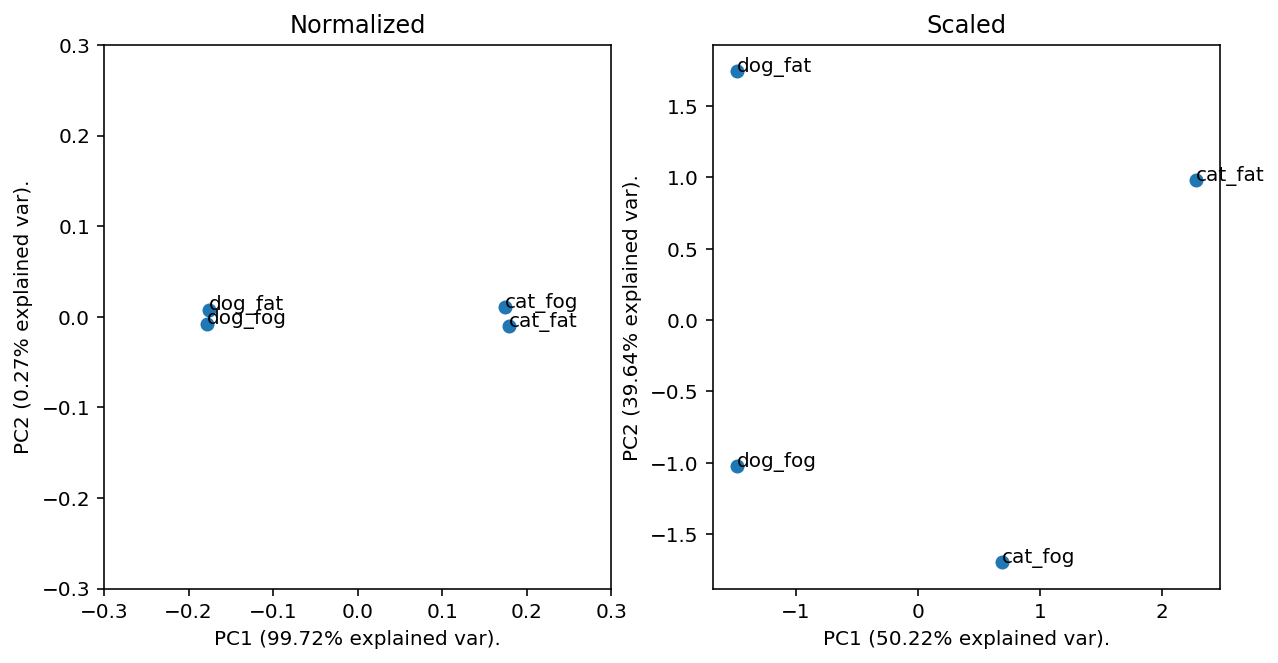

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].set_title('Normalized')
ax[0].scatter(reduced_dummy_norm[:,0], 
              reduced_dummy_norm[:,1], 
             )
ax[0].set_xlim(-0.3, 0.3)
ax[0].set_ylim(-0.3, 0.3)
ax[0].set_xlabel('PC1 ({}% explained var).'.format(round(pca_dummy_norm.explained_variance_ratio_[0] * 100,2)))
ax[0].set_ylabel('PC2 ({}% explained var).'.format(round(pca_dummy_norm.explained_variance_ratio_[1] * 100,2)))
for i, text in enumerate(reduced_dummy_norm):
    ax[0].text(text[0], text[1], labels[i])
    

ax[1].set_title('Scaled')
ax[1].scatter(reduced_dummy_scaled[:,0], 
              reduced_dummy_scaled[:,1], 
             )
ax[1].set_xlabel('PC1 ({}% explained var).'.format(round(pca_dummy_scaled.explained_variance_ratio_[0] * 100,2)))
ax[1].set_ylabel('PC2 ({}% explained var).'.format(round(pca_dummy_scaled.explained_variance_ratio_[1] * 100,2)))

for i, text in enumerate(reduced_dummy_scaled):
    ax[1].text(text[0], text[1], labels[i])

## Alternative approach: pooled FastText embeddings

In [17]:
import os
import string 

import fasttext
import fasttext.util

from cltk.tokenize.word import WordTokenizer

EMBEDDING_DIM = 300
TEXT_DIR = 'texts/'

fasttext.util.download_model('la', if_exists='ignore') 
ft = fasttext.load_model('cc.la.300.bin')

word_tokenizer = WordTokenizer('latin')

In [18]:
def load_embeddings(text_path):
    text = open(text_path, 'r').read()
    tokenized_text = word_tokenizer.tokenize(text)
    tokenized_text_no_punct = [word.lower() for word in tokenized_text if word not in string.punctuation]
    x = np.zeros((len(tokenized_text_no_punct), EMBEDDING_DIM))
    for i, word in enumerate(tokenized_text_no_punct):
        x[i, :] = ft.get_word_vector(word)
    return x

file_names = [text_file for text_file in os.listdir(TEXT_DIR)]
embeddings = [load_embeddings(TEXT_DIR + file_name) for file_name in file_names]

In [19]:
avg_pooled_embeddings = [np.mean(embedding, axis=0) for embedding in embeddings]

In [20]:
pca_embeddings = PCA()
components_embed = pca_embeddings.fit_transform(avg_pooled_embeddings)

(-0.03, 0.05)

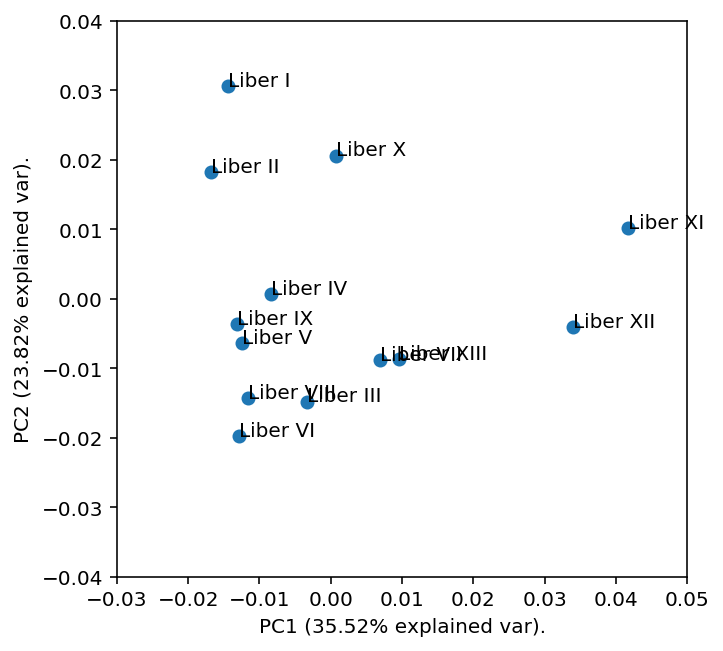

In [21]:
plt.figure(figsize=(5.11, 5.11))
plt.scatter(components_embed[:,0], components_embed[:,1])
for i, text in enumerate(components_embed):
    plt.text(text[0], text[1], file_names[i].strip('.txt'), ha='left')
    
plt.xlabel('PC1 ({}% explained var).'.format(round(pca_embeddings.explained_variance_ratio_[0] * 100,2)))
plt.ylabel('PC2 ({}% explained var).'.format(round(pca_embeddings.explained_variance_ratio_[1] * 100,2)))
 
plt.ylim(-0.04,0.04)
plt.xlim(-0.03,0.05)